In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
data = pd.read_csv("/Users/harshilpatel/Desktop/Water_Quality_Monitoring/Data/water_potability.csv")

In [17]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [18]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB
None


In [20]:
data_dup = data.drop_duplicates() # Removing duplicate values

In [21]:
data.isna().sum() # checking for Null Values

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [23]:
data = data.fillna(data.mean()) # filling all null values with respective mean values

In [30]:
print(data.isna().sum())

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


In [28]:
print(data.head())

         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0  7.080795  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246  333.775777    592.885359   
2  8.099124  224.236259  19909.541732     9.275884  333.775777    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  


In [29]:
print(data.describe())

                ph     Hardness        Solids  Chloramines      Sulfate  \
count  3276.000000  3276.000000   3276.000000  3276.000000  3276.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.469956    32.879761   8768.570828     1.583085    36.142612   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.277673   176.850538  15666.690297     6.127421   317.094638   
50%       7.080795   196.967627  20927.833607     7.130299   333.775777   
75%       7.870050   216.667456  27332.762127     8.114887   350.385756   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3276.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        15.769881     0.780382     0.487849  


In [32]:
data_cleaned = data.to_csv("/Users/harshilpatel/Desktop/Water_Quality_Monitoring/Data/cleaned_water_protability_data.csv", index=False)

In [33]:
cleaned_data = pd.read_csv("/Users/harshilpatel/Desktop/Water_Quality_Monitoring/Data/cleaned_water_protability_data.csv")

In [34]:
import seaborn as sns

In [35]:
features = cleaned_data.drop("Potability",axis=1)
target = cleaned_data["Potability"]

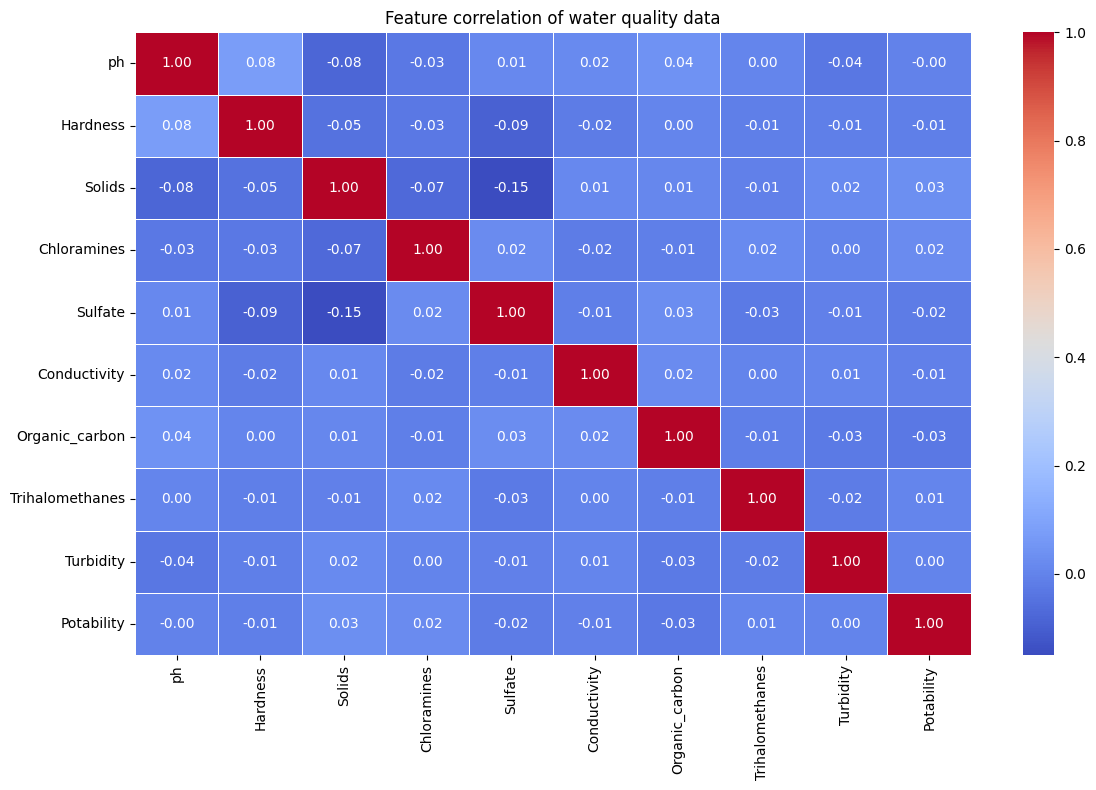

In [39]:
plt.figure(figsize=(12,8))
corr = cleaned_data.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm',fmt='.2f',linewidths=0.5)
plt.title("Feature correlation of water quality data")
plt.tight_layout()
plt.show()


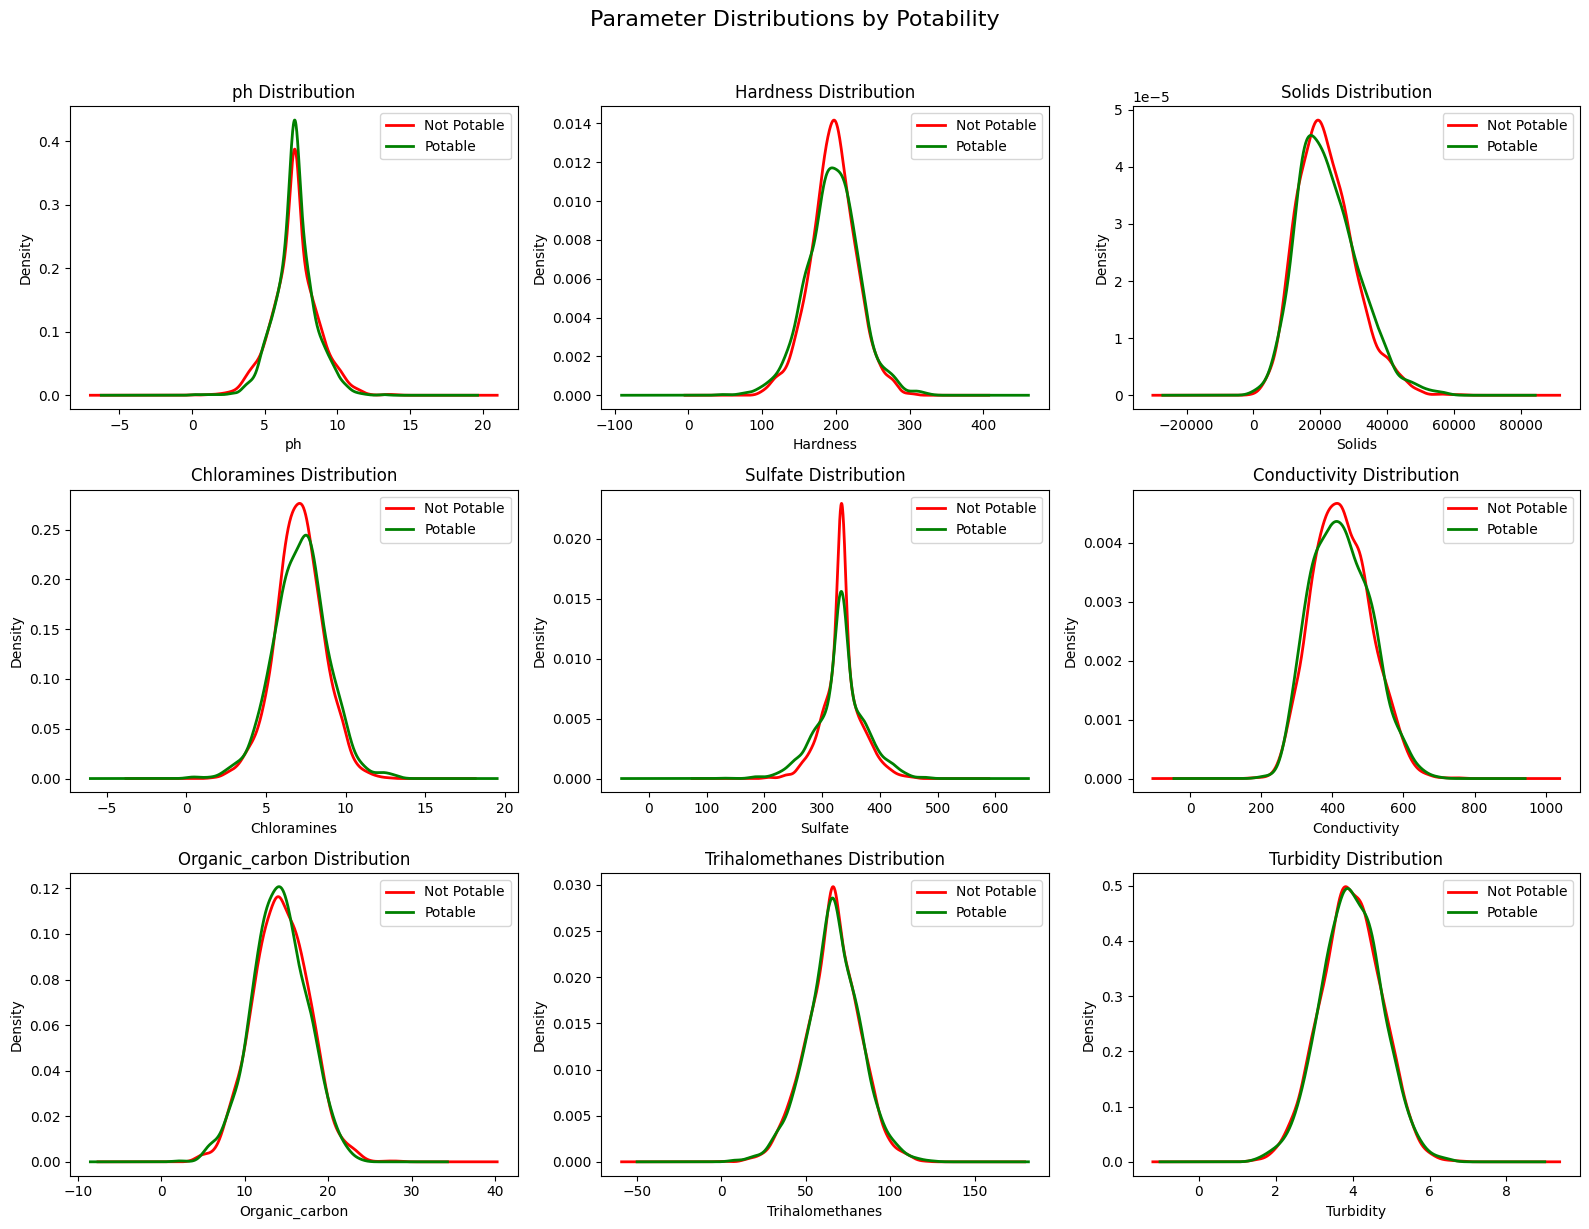

In [45]:


features = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate',
            'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']

fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.flatten()

for i, col in enumerate(features):
    for label, color in zip([0, 1], ['red', 'green']):
        subset = cleaned_data[cleaned_data['Potability'] == label][col].dropna()
        subset.plot.kde(ax=axes[i], label='Not Potable' if label==0 else 'Potable',
                        color=color, linewidth=2)
    axes[i].set_title(f'{col} Distribution')
    axes[i].legend()
    axes[i].set_xlabel(col)

plt.suptitle('Parameter Distributions by Potability', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()